In [1]:
from network import Net
from trainers import *
from validator import *
import numpy as np
import pandas as pd

In [2]:
#load data TRAIN
data = pd.read_csv(r'C:\Users\Tano\Documents\UNI\MAGISTRALE\ML\nn_from_scratch\datasets\cup\ML-CUP24-TR.csv', header=None, skiprows=7)
data = data.to_numpy()

#split data in train 80% and test 20%
np.random.shuffle(data)
train = data[:int(len(data)*0.8)]
test = data[int(len(data)*0.8):]

#split in x and y
x_train = train[:,1:-3]
y_train = train[:,-3:]
x_test = test[:,1:-3]
y_test = test[:,-3:]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(200, 12)
(200, 3)
(50, 12)
(50, 3)


In [3]:
network = Net('./config_cup.yaml')
network.print_structure()

Layer 1: Units = 768, Activation = relu
Layer 2: Units = 768, Activation = relu
Layer 3: Units = 3, Activation = identity


In [5]:
# first grid search
valid = Validator('param_grid_cup.yaml')
print(len(valid.grid))

best_configuration = valid.grid_search(x_train, y_train, network)
best_configuration

648


100%|██████████| 648/648 [1:40:58<00:00,  9.35s/it]


{'conf': {'activations': ['relu', 'relu', 'identity'],
  'alpha': 0.9,
  'eta': 0.001,
  'initializer': 'he',
  'lambd': 1e-05,
  'units': [1024, 1024, 3]},
 'epochs': 402,
 'metrics': np.float64(4.077944746740005)}

In [4]:
#second grid search, fine grained
valid = Validator('param_grid_cup2.yaml')
print(len(valid.grid))

best_configuration = valid.grid_search(x_train, y_train, network)
best_configuration

81


100%|██████████| 81/81 [12:21<00:00,  9.15s/it]


{'conf': {'activations': ['relu', 'relu', 'identity'],
  'alpha': 0.8,
  'eta': 0.001,
  'initializer': 'he',
  'lambd': 5e-06,
  'units': [768, 768, 3]},
 'epochs': 303,
 'metrics': np.float64(3.828270287911239)}

err_fun: mse
metric: mee
input_features: 12
initializer: he
eta: 0.001
alpha: 0.8
lambd: 5e-06
epochs: 303
units: [768, 768, 3]
activations: ['relu', 'relu', 'identity']


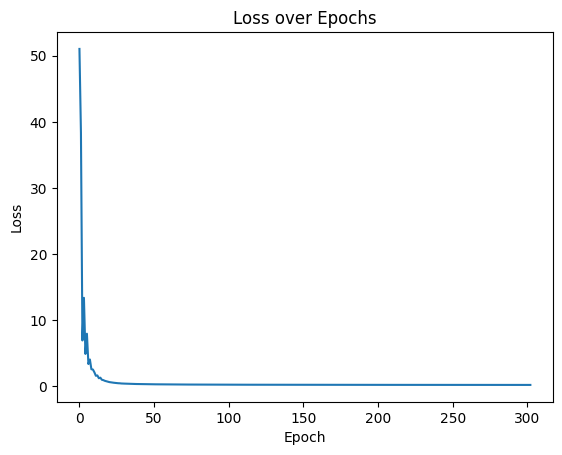

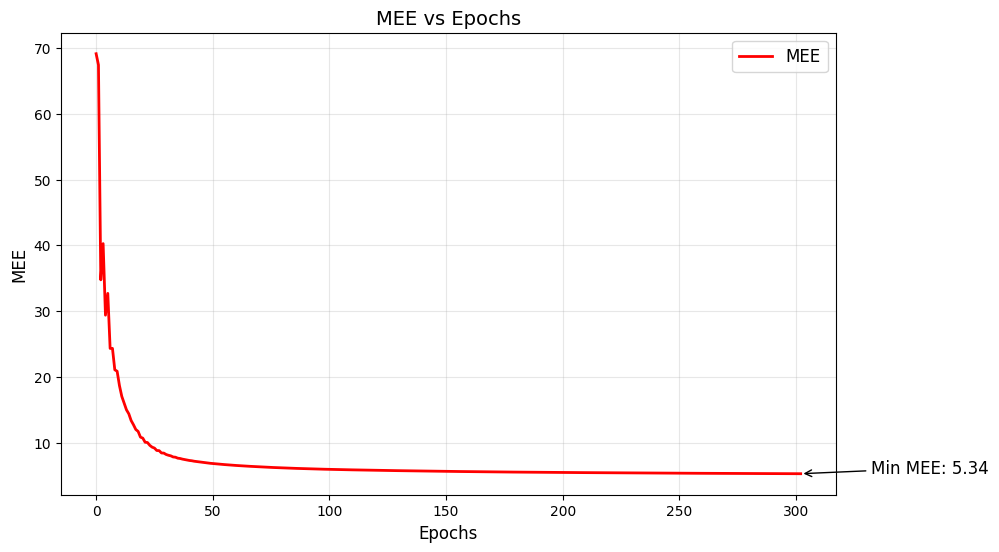

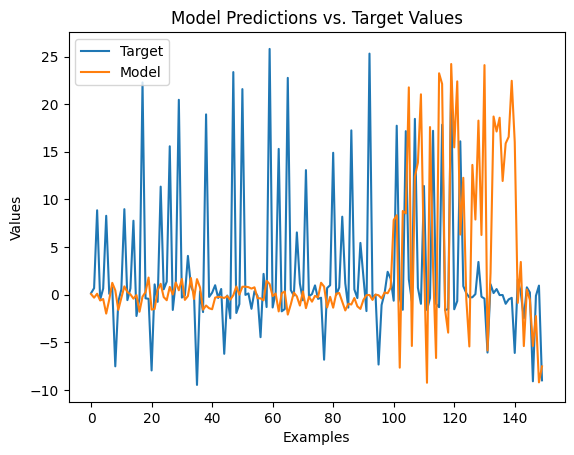

Metric value:  3.4602653914635026


In [5]:
network.set_best_configuration(best_configuration)
model = train_model(x_train, y_train, network.get_W(), network.get_b(), network.get_layers(), network.get_hyperparameters())
loss_plot('loss_values.csv')
plot_mee('mee_values.csv')
test_model_temp(x_test, y_test, model[0], model[1], network.get_layers(), network.get_hyperparameters()['metric'])

Layer 1: Units = 768, Activation = relu
Layer 2: Units = 768, Activation = relu
Layer 3: Units = 3, Activation = identity


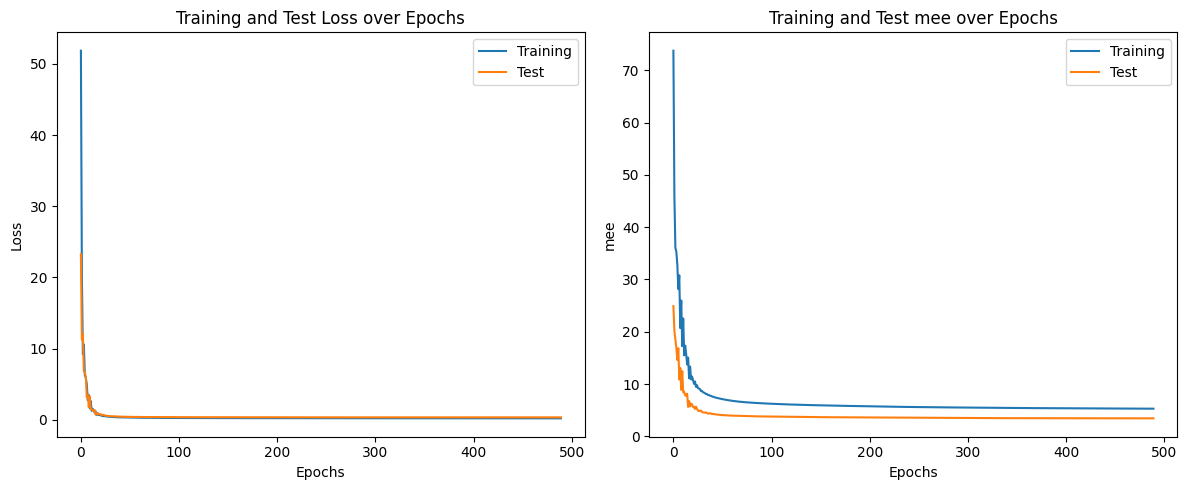

train_loss  :  0.19947268639976434
test_loss  :  0.3404723401793594
train_metric  :  5.295156597106955
test_metric  :  3.446588701829763


In [6]:
network = Net('./config_cup.yaml')
network.print_structure()

results = train_and_evaluate(x_train, y_train, x_test, y_test, network.get_W(), network.get_b(), network.get_layers(), network.get_hyperparameters())

for key in results.keys():
    if key != 'model':
        print(key, ' : ', results[key])

In [7]:
#load data TEST
data_TS = pd.read_csv(r'C:\Users\Tano\Documents\UNI\MAGISTRALE\ML\nn_from_scratch\datasets\cup\ML-CUP24-TS.csv', header=None, skiprows=7)
data_TS = data_TS.to_numpy()
x_TS = data_TS[:,1:]
print(x_TS.shape)

cup_labels = blind_test(x_TS, results['model'][0], results['model'][1], network.get_layers())
#save cup_labels in a csv file
np.savetxt("cup_labels.csv", cup_labels, delimiter=",")
# print the first 10 labels
print(cup_labels[:10])

(500, 12)
[[ 2.95355727e-01 -1.99872850e+00  2.61634088e+01]
 [-3.25215150e-01  1.66804169e+00  2.53894810e+01]
 [ 1.37483325e+00  1.72787414e-02 -1.75678718e+01]
 [ 1.49868056e-01 -1.34738093e-01 -3.88871658e+00]
 [ 1.09846493e-01  2.16562244e-02  3.29232025e+00]
 [-1.18287685e+00 -7.38949547e-01  3.17684124e+01]
 [ 2.01745516e-01 -4.86516053e-01  5.39824766e+00]
 [-3.88459860e-01 -4.57225016e-01 -5.37590714e+00]
 [-1.67763746e+00 -1.62514282e-01  1.57836725e+01]
 [-6.65033368e-01  5.74665014e-01  8.75044362e+00]]


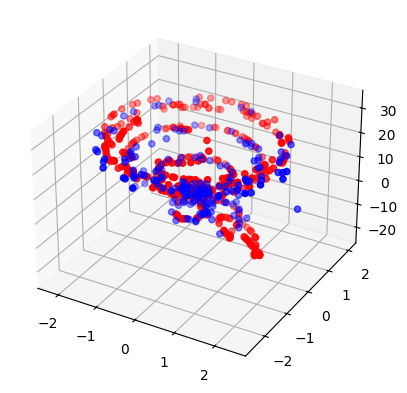

In [8]:
# plot the dataset and the cup_labels in 3d
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cup_labels[:,0], cup_labels[:,1], cup_labels[:,2], c='r', marker='o')
ax.scatter(y_train[:,0], y_train[:,1], y_train[:,2], c='b', marker='o')
plt.show()